In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

### 1.1 Carregamento da base

In [9]:
base = pd.read_csv('../base_encoded.csv')
base.columns = ['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','mau','sexo','posse_de_veiculo','posse_de_imovel','tipo_renda_Pensioner','tipo_renda_State servant','tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education','educacao_Incomplete higher', 'educacao_Lower secondary','educacao_Secondary / secondary special', 'estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow','tipo_residencia_House / apartment','tipo_residencia_Municipal apartment','tipo_residencia_Office apartment','tipo_residencia_Rented apartment','tipo_residencia_With parents','possui_fone_comercial','possui_fone','possui_email']
print(base.shape)
base.head()

(16650, 28)


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda_Pensioner,tipo_renda_State servant,...,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,possui_fone_comercial,possui_fone,possui_email
0,0,58.832877,3.106849,2.0,False,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1.0,False,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
2,0,52.356164,8.358904,1.0,False,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,1
3,0,46.224658,2.106849,2.0,False,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,0,29.230137,3.021918,2.0,False,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
# tipos de dados e dados ausentes
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   qt_pessoas_residencia                   16650 non-null  float64
 4   mau                                     16650 non-null  bool   
 5   sexo                                    16650 non-null  int64  
 6   posse_de_veiculo                        16650 non-null  int64  
 7   posse_de_imovel                         16650 non-null  int64  
 8   tipo_renda_Pensioner                    16650 non-null  int64  
 9   tipo_renda_State servant                16650 non-null  int64  
 10  tipo_renda_Student                      16650 non-null  in

Vemos que não temos strings, apenas números (int e float) e booleanos (vou trocar por 0-False e 1-True)

In [11]:
base.mau.value_counts()

False    16260
True       390
Name: mau, dtype: int64

In [12]:
base.mau = base.mau.map({True: 1, False:0})
base.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

### 1.2 Treino e teste

In [23]:
# separando variável resposta (y) e variáveis explicativas (X)
X = base.drop('mau', axis=1)
y = base.mau
X.shape, y.shape

((16650, 27), (16650,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'X_test:{X_test.shape}, y_test:{y_test.shape}')
print(f'X_train:{X_train.shape}, y_train:{y_train.shape}')

X_test:(4995, 27), y_test:(4995,)
X_train:(11655, 27), y_train:(11655,)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [25]:
# 1
arvore_decisao = DecisionTreeClassifier(random_state=100)

# 2
arvore_decisao = arvore_decisao.fit(X_train,y_train)

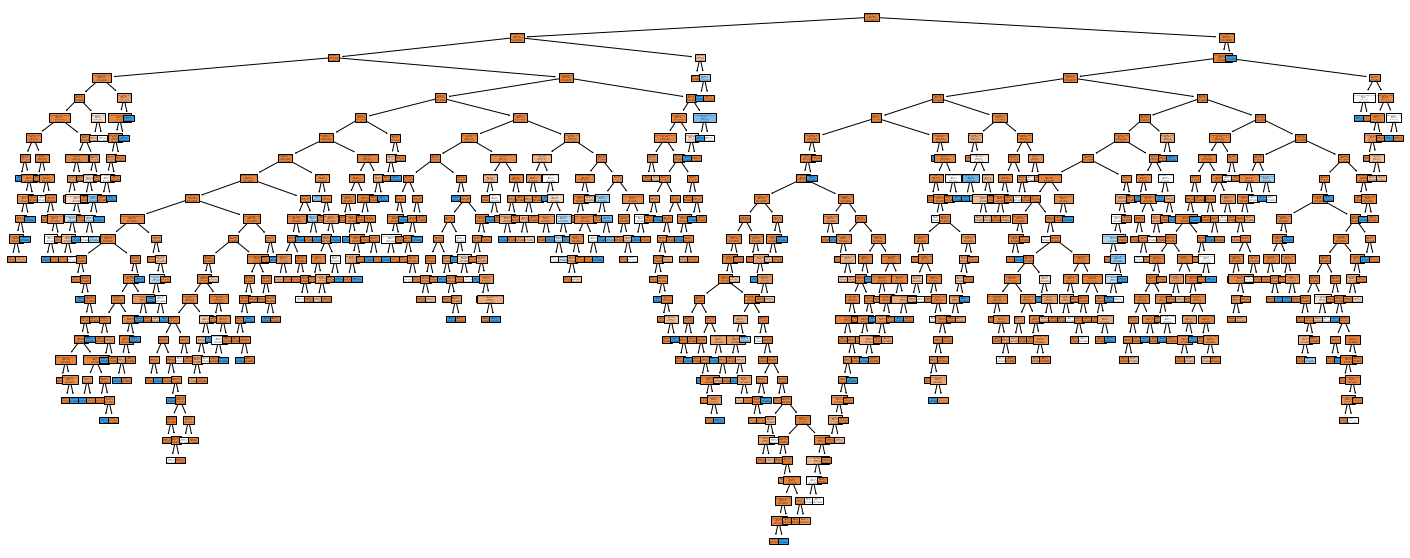

In [29]:
# 3
plt.figure(figsize=(25, 10))
plot_tree(arvore_decisao,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


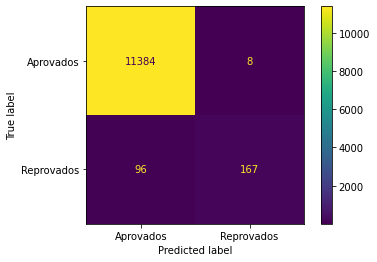

In [32]:
# 4
plot_confusion_matrix(arvore_decisao, X_train, y_train, display_labels=['Aprovados', 'Reprovados']);

In [38]:
# 5
pred = arvore_decisao.predict(X_train)
accuracy_score(y_train, pred)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [39]:
# 1
pred = arvore_decisao.predict(X_test)
pred.shape

(4995,)

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


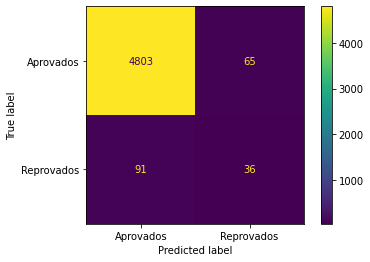

In [36]:
# 2
plot_confusion_matrix(arvore_decisao, X_test, y_test, display_labels=['Aprovados', 'Reprovados']);

In [40]:
# 3
accuracy_score(y_test, pred)

0.9687687687687687

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


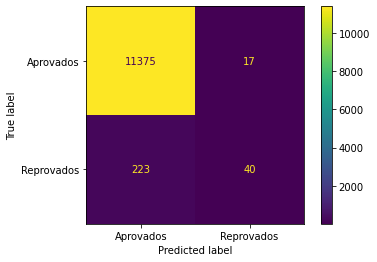

In [42]:
# 4
arvore_decisao_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
arvore_decisao_podada = arvore_decisao_podada.fit(X_train,y_train)
plot_confusion_matrix(arvore_decisao_podada, X_train, y_train, display_labels=['Aprovados', 'Reprovados']);

In [51]:
# Proporção de proponentes classificados como maus:

TP = 11375 # classificados corretamente como bons
TN = 40 # classificados corretamente como maus
FP = 223 # classificados incorretamente como bons
FN = 17 # classificados incorretamente como maus

predicted_maus = TN + FN  # classificados como maus

print(f'Classificados como mau: {round(((predicted_maus)/(FP+FN+TP+TN)), 4) * 100}%')

Classificados como mau: 0.49%


In [53]:
# 5
base.mau.value_counts()

0    16260
1      390
Name: mau, dtype: int64

In [54]:
# proporção de bons
16260 / (16260 + 390)

0.9765765765765766

In [55]:
# proporção de maus
390 / (16260 + 390)

0.023423423423423424

Olhando para a distribuição de bons e maus dentro da classificação real, vemos que apenas **~97.66%** são classificados como bons de verdade, ou seja, essa seria a accurácia, pois acertaríamos 16260/16650 e erraríamos 390/16650.